# **Esame del 30 Giugno 2023**

- Non si possono consultare libri, note, ed ogni altro materiale o persone durante
l’esame ad eccezione delle funzioni Python fornite.

- Risolvere i seguenti esercizi con l’ausilio di Python.

- La durata del compito è di 90 minuti.

- Questo esame ha 3 domande, per un totale di 30/30 punti.

- Svolgere gli esercizi marcati con [T] su fogli protocollo, indicando: nome, cognome, codice persona
e data

# **Esercizio 1 (punti 10)**

Si consideri la seguente funzione

$$f(x) = x\sin(x)$$

per $x \in [-1,1]$.

**(a) (1 punto) [P]** Si rappresenti $f$ in Python e si identifichi il valore $\alpha$ tale che $f(\alpha)=0$.




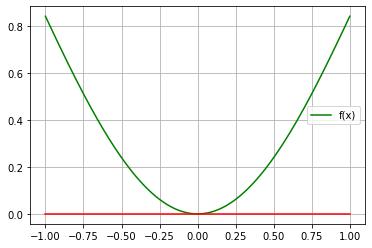

In [27]:
# Ecco una possibile soluzione:

import functions # prendiamo tutte le funzioni dalla libreria fornita
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: x * np.sin(x)

# estremi dell'intervallo
a = -1
b = 1
x_val = np.linspace(a,b,1000)

plt.figure()
plt.plot(x_val,f(x_val),'g-')
plt.plot(x_val, 0.0 * x_val, 'r-')
plt.legend(["f(x)"])
plt.grid()


Notiamo che il valore di $\alpha$ tale per cui $f(\alpha)=0 $ è proprio $\alpha = 0$.

**(b) (3 punti) [T]** Derivare il Metodo di Newton per la ricerca degli zeri di una funzione, riportando anche le sue proprietà di convergenza.

**Soluzione.** Fissata l'iterazione $k$-esima e dato un valore di tentativo per lo zero esatto $x^k$, la retta tangente a $f$ in $x^k$ è data da

$$\frac{f(x)-f(x^k)}{x-x^k}=f'(x^k)\quad \iff \quad f(x)=f(x^k)+f'(x^k)(x-x^k).$$

Ne segue che, dato $x^k$, il punto $x^{k+1}$ è calcolato come punto di intersezione della retta tangente con l'asse $x$. In altre parole ciascuna iterata $x^k$ rappresenta il punto di intersezione tra la retta tangente approssimante $f$ e l'asse delle $x$. Al passo $k+1$ si ha dunque che

$$f(x^{k+1})=f(x^k)+f'(x^k)(x^{k+1}-x^k) \quad \iff \quad x^{k+1} = x^k - \frac{f(x^k)}{f'(x^k)}.$$

La convergenza del metodo è assicurata dal seguente

**Teorema 1.** *Sia $f:[a,b]⟶\mathbb{R}$ una funzione di classe $C^2([a,b])$. Sia $\alpha$ tale che $f'(\alpha)\neq 0$ e $f(\alpha)=0$. Allora esiste $\eta >0$ tale che $|x^0-\alpha|<\eta$, per qualche $x^0$, segue che*

$$|x^k-\alpha|<\eta,\,\, \forall k \in \mathbb{N}.$$

*In particolare il metodo converge con ordine 2 e vale che*

$$\lim_{k→\infty}\frac{x^{k+1}-\alpha}{(x^k-\alpha)^2}=\frac{f''(\alpha}{2f'(\alpha}=c \in \mathbb{R}.$$

**(c) (2 punti) [P]** Applicare il metodo di Newton per il calcolo di $\alpha$, partendo da una guess iniziale pari a $x^0 = 0.5$ e impostare una tolleranza pari a $tol=1e-8$. Rappresentare in scala semilogaritmica l'errore ottenuto e commentare alla luce della teoria.


 Numero di iterazioni: 26 

 Zero calcolato: 7.030241e-09



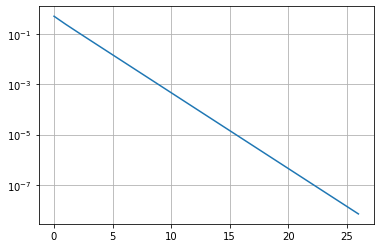

In [28]:
# Ecco una possibile implementazione:

x0 = 0.5
tol = 1e-8
nmax = 100

df = lambda x: np.sin(x) + x * np.cos(x)

xvect,it = functions.newton(x0,nmax,tol,f,df) 

plt.figure()
plt.semilogy(np.abs(xvect))
plt.grid()

Notiamo la convergenza lineare del metodo con un numero di iterate pari a 26.

**(d) (2 punti) [T]** Si proponga una modifica al metodo di Newton per il calcolo degli zeri di molteplicità algebrica superiore a 1.

**Soluzione.** Introducendo $m$ come molteplicità algebrica dello zero $\alpha$, possiamo modificare il metodo di Newton ponendo

$$x^{k+1} = x^k - m\frac{f(x^k)}{f'(x^k)}.$$

Se tale metodo converge, allora converge quadraticamente. Notiamo che, come nel caso del metodo di Newton classico, anche questo metodo è a convergenza locale, per una guess $x^0$ sufficientemente vicina al valore di $\alpha$.

**(e) (2 punti) [P]** Si estenda opportunamente la function del metodo di Newton in modo da implementare quanto proposto al punto precedente. Utilizzando questa nuova funzione, ripetere quanto fatto al punto (c), sovrapponendo gli errori sullo stesso grafico. Commentare i risultati ottenuti.

In [29]:
# Creiamo qui la function di newton modificato

def newton_modificato (x0,nmax,toll,f,df,m):
    x = x0
    it = 0
    dif = tol+1
    err = []
    xvect = [x]
    while (it<nmax and dif>tol):
        if df(x) == 0:
            raise RuntimeError("Azzeramento della derivata")
        else:
            xn = x - m * f(x)/df(x)
            dif = abs(xn-x)
            err.append(dif)
            x = xn
            xvect.append(x)
            it += 1
    return xvect,it,err


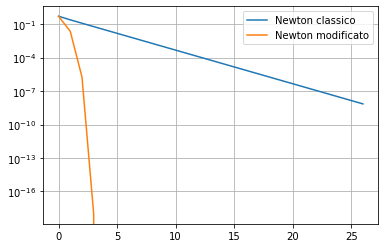

In [30]:
# Applichiamo i due metodi separatamente e confrontiamo i risultati

m = 2 # molteplicità
xvect_mod, it_mod, err_mod = newton_modificato (x0,nmax,tol,f,df,m)

plt.figure()
plt.semilogy(np.abs(xvect))
plt.semilogy(np.abs(xvect_mod))
plt.legend(["Newton classico","Newton modificato"])
plt.grid()

Come si vede dal grafico, il metodo di Newton modificato si arresta dopo 4 iterazioni, contro le 26 del metodo classico, mostrando una convergenza molto più rapida.

# **Esercizio 2 (10 punti)**

Si consideri la seguente matrice

$$A=\begin{bmatrix} 1&1&1&1&1\\
1 & 2& 3&4&5\\
1&3&6&10&15\\
1&4&10&20&35\\
1&5&15&35&70 \end{bmatrix} $$

che si può ottenere su Python tramite la libreria **scipy.linalg**, con comando **pascal(n)**, dove $n$ è la dimensione della matrice.

**(a) (3 punti) [P+T]** Enunciare la condizione necessaria e sufficiente per l'esistenza e unicità della fattorizzazione $LU$ e verificare (con opportuni comandi) che è soddisfatta per la matrice $A$ di dimensione $n=5$.

**Soluzione.** Sia $A$ una matrice di ordine $n$ non singolare. Allora esiste ed è unica la fattorizzazione $LU$ se e solo se tutte le sottomatrici principali di $A$ sono non singolari.

In [1]:
# Ecco una possibile soluzione

import numpy as np
import scipy.linalg as sl
import matplotlib.pyplot as plt
import functions

n = 5
A = sl.pascal(n)

singolare = False

for i in range(1,n+1):
  if (sl.det(A[0:i,0:i])==0): # calcolo il det di ogni sottomatrice
    singolare = True # se ne trovo uno nullo, il flag "singolare" diventa vero
if singolare:
  print("La matrice non ammette fattorizzazione LU")
else:
    print("La fattorizzazione esiste ed è unica")

La fattorizzazione esiste ed è unica


**(b) (3 punti) [P]** Data la soluzione esatta $x = [1,1,...,1]^T$ costruire il termine noto $b$ e risolvere il sistema lineare $Ax = b$ utilizzando:

i) la fattorizzazione $LU$,

ii) i metodi di sostituzione in avanti e all'indietro disponibili nella libreria **functions.py** fornita.

Verificare se è stato effettuato il pivoting.

In [4]:
# Vediamo una possibile soluzione

import numpy as np

x_esatta = np.ones(n)
b = A @ x_esatta

P,L,U = sl.lu(A)

if (np.all(np.abs(P-np.eye(n))==0)):
  print("Pivoting non effettuato")
else:
  print("Pivoting effettuato")

y = functions.fwsub(L,P.T@b)
x = functions.bksub(U,y)

print(x)

Pivoting effettuato
[1. 1. 1. 1. 1.]


**(c) (4 punti) [P+T]** Ripetere i passaggi al punto precedente per matrici di dimensione $n = 10$, $15$ e $20$. Per ognuno dei casi calcolare la norma dell’errore relativo e il condizionamento della matrice e rappresentarli su due grafici in scala logaritmica. Commentare i risultati alla luce della teoria.

Pivoting effettuato
Pivoting effettuato
Pivoting effettuato


Text(0.5, 1.0, 'numero di condizionamento')

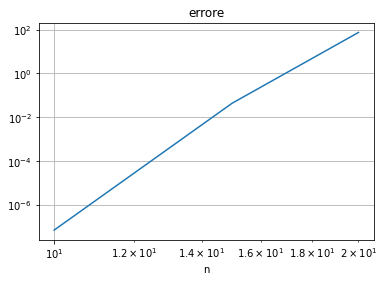

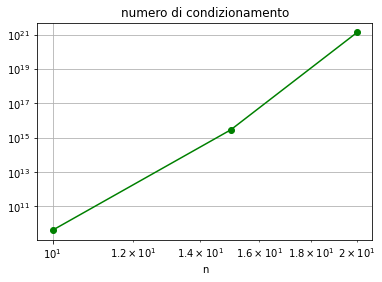

In [6]:
err = []
cond = []
for n in [10, 15, 20]:
    A = sl.pascal(n)
    x_ex = np.ones(n)
    b = A @ x_ex
    P, L, U = sl.lu(A)
    if (np.all(np.abs(P-np.eye(n))==0)):
        print("Pivoting non effettuato")
    else:
        print("Pivoting effettuato")
    y = functions.fwsub(L, P.T@b)
    x = functions.bksub(U, y)
    err.append(np.linalg.norm(x-x_ex)/np.linalg.norm(x_ex))
    cond.append(np.linalg.cond(A))

plt.figure()
plt.loglog([10, 15, 20], err)
plt.xlabel("n")
plt.grid()
plt.title("errore")
plt.figure()
plt.loglog([10, 15, 20],cond ,'g-o')
plt.grid()
plt.xlabel("n")
plt.title("numero di condizionamento")

Notiamo una crescita notevole dell'errore, all'aumentare della dimensione della matrice in input. Questo fenomeno è dovuto all'incremento dell'indice di condizionamento $K(A)$, che determina una possibile amplificazione degli errori in output e dunque una peggiore approssimazione numerica.

# **Esercizio 3 (10 punti)**

Si consideri il seguente problema già affrontato nella parte 1 dell'esame.

$$\begin{cases}
\partial_t u - \partial_{xx} u = 1 & \text{se } x \in (0,\pi),\,\, t>0\\
u(t,0) = u(t,\pi) = 0 & \text{se } t>0\\
u(0,x) = 0 & \text{se } x\in (0,\pi)
\end{cases}
$$

**(a) (5 punti) [T]** Introdurre brevemente l'approssimazione del problema con il metodo degli elementi finiti in spazio e un generico $\theta-$metodo in tempo. Derivare l'espressione matriciale (senza dettagliare i singoli elementi delle matrici).

**Soluzione.** Sia $V=H^1_0(\Omega)$ e siano $v\in V$ funzioni test dipendenti da $t$. Scriviamo la formulazione debole del problema differenziale:

Trovare, per ogni $t\in (0,T)$, $u(x,t)\in V$ di modo che

$$\int_a^b \partial_t u\,v\,dx + \int_a^b \partial_x u\,\partial_x v\,dx = \int_a^b v\,dx, \quad \forall v \in V$$,
dove $a=0$ e $b=\pi$.

Deriviamo la formulazione discreta del problema, fissando il tempo e operando in spazio. Sia $V_h \subset V$ un sottospazio finito dimensionale. Allora il problema diventa quello di:

Trovare, per ogni $t\in (0,T)$, $u_h(t) \in V_h$ tale che

$$\int_a^b \partial_t u_h\,v_h\,dx + \int_a^b \partial_x u_h\,\partial_x v_h\,dx = \int_a^b v_h\,dx, \quad \forall v_h \in V_h$$.

Introducendo le forme bilineari

$$a(u_h,v_h) =\int_a^b \partial_x u_h\,\partial_x v_h\,dx \qquad
m(u_h,v_h) =  \int_a^b  u_h v_h\,dx
$$

e il termine di carico $F$ come

$$F(v_h) = \int_a^b v_h\,dx,$$

il problema può essere riscritto come

$$m(\partial_t u_h(t),v_h)+a(u_h,v_h)=F(v_h),\qquad \forall v_h \in V_h.$$

Se consideriamo una base $\lbrace\phi_j\rbrace$ per $V_h$ di generatori linearmente indipendenti, allora le funzioni $u_h$ e $v_h$ si possono scrivere come

$$u_h(x,t) = \sum_{j=1}^{N_h} u_j(t)\phi_j(x)\quad \text{e} \quad v_h(x,t) = \sum_{i=1}^{N_h} \alpha_i(t)\phi_i(x). $$

Da qui, si può sfruttare la bilinearità della forma $a(\cdot,\cdot)$, la linearità di $F$ e l'indipendenza del dominio dal tempo per ottenere

$$\partial_t m \left(\sum_{j=1}^{N_h} u_j(t)\phi_j(x),\phi_i\right)+a\left(\sum_{j=1}^{N_h} u_j(t)\phi_j(x),\phi_i\right)=F(\phi_i),\quad \forall i =1,...,N_h$$

da cui finalmente

$$\sum_{j=1}^{N_h}\partial_t u_j(t) m \left( \phi_j,\phi_i\right)+\sum_{j=1}^{N_h} u_j(t) a\left(\phi_j,\phi_i\right)=F(\phi_i),\quad \forall i =1,...,N_h$$

Introducendo ora la matrice di stiffness $A$ e di massa $M$, definite rispettivamente da

$$A \in \mathbb{R}^{N_h\times N_h}: \quad a_{ij}=a(\phi_k,\phi_i)$$
$$M \in \mathbb{R}^{N_h\times N_h}: \quad m_{ij}=m(\phi_k,\phi_i)$$

il problema semi discreto diventa quello di determinare il vettore tempo dipendente $\mathbf{u}(t)$ tale che

$$Md_t \mathbf{u}(t)+A\mathbf{u}(t) = \mathbf{f}.$$

**(b) (3 punti) [P]** Si consideri una griglia di ampiezza uniforme $h = \pi/20$. Si risolva il problema con il metodo di Eulero Esplicito, usando un passo temporale $\Delta t=0.25$, quindi si ripeta il calcolo con $\Delta t=0.0025$. Utilizzare la function $\texttt{heatsolve}$ fornita di seguito. Si rappresentino le soluzioni e si commentino alla luce della teoria.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from fem import install

install()
from fem import Line, generate_mesh, FEspace, assemble, interpolate, deriv, dx, ds, DirichletBC, applyBCs, dof2fun, fun2dof, dofs, plot

def heatSolve(D,f,u0,L,h,T,dt,theta):
  """"
  Input:
     D      (float)                  Coefficiente di diffusione (positivo).
     f      (lambda function)        Forzante. Si assume f = f(x,t).
     u0     (lambda function)        Condizione iniziale.
     L      (float)                  Lunghezza dell'intervallo spaziale.
     h      (float)                  Passo della griglia spaziale.
     T      (float)                  Tempo finale
     dt     (float)                  Passo temporale.
     theta  (float)                  Parametro del theta-metodo.

  Output:
    V                               spazio elementi finiti
    u     (numpy.ndarray)-> matrix  Matrice contenente la soluzione
                                    approssimata del problema. Uij
                                    approssima u(dof_i, tj): ogni colonna è un
                                    tempo fissato.
    t      (numpy.ndarray)-> vector Griglia temporale.
  """""
  # costruisco il dominio
  domain = Line(0, L)
  # costruisco la mesh
  mesh = generate_mesh(domain, stepsize = h)
  # costruisco lo spazio FEM di grado 1
  V = FEspace(mesh, 1)

  # costruisco la griglia temporale
  nt = np.ceil(T/dt)+1
  t = np.zeros(int(nt))

  # initializzo la soluzione
  u = np.zeros((dofs(V).size, int(nt)))

  # definisco la condizione iniziale
  u0h = fun2dof(interpolate(u0,V))
  u[:, 0] = u0h

  # matrice di massa
  def m(u, v):
    return u*v*dx
  # assemblaggio matrice di massa
  M = assemble(m, V)

  # matrice di diffusione
  def a(u,v):
    return deriv(u)*deriv(v)*dx
  # assemblaggio matrice di diffusione
  A = D*assemble(a,V)

  # ciclo temporale
  for n in range(int(nt)-1):
    # costruzioni termini noti al tempo dt e dt+1
    t_old = n*dt
    t_new = (n+1)*dt

    fold = lambda x: f(x,t_old)
    fnew = lambda x: f(x,t_new)

    fold_h = interpolate(fold, V)
    def lold(v):
      return fold_h*v*dx
    Fold = assemble(lold, V)

    fnew_h = interpolate(fnew, V)
    def lnew(v):
      return fnew_h*v*dx
    Fnew = assemble(lnew, V)

    # condizioni al bordo omogenee di tipo dirichlet
    def isLeftNode(x):
      return x < 1e-12

    def isRightNode(x):
      return x > L - 1e-12

    dbc1 = DirichletBC(isLeftNode,  0.0)
    dbc2 = DirichletBC(isRightNode, 0.0)

    A = applyBCs(A, V, dbc1, dbc2)
    M = applyBCs(M, V, dbc1, dbc2)
    Fold = applyBCs(Fold, V, dbc1, dbc2)
    Fnew = applyBCs(Fnew, V, dbc1, dbc2)

    # Costruzione del sistema lineare e sua risoluzione
    B = (M/dt+theta*A)
    b = (M/dt-(1-theta)*A)@u[:,n] + theta*Fnew +(1-theta)*Fold

    from scipy.sparse.linalg import spsolve

    u[:,n+1] = spsolve(B, b)
    t[n+1] = t_new

  return V,u,t

In [8]:
import numpy as np
from fem import xtplot


f = lambda x,t : 1 + 0 * x
u0 = lambda x : 0 * x
L = np.pi
T = 10
D = 1
N = 20
h = L/N

theta = 0 #Eulero Esplicito 


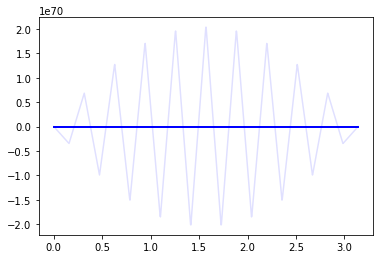

In [9]:
dt=0.25
V,u,t = heatSolve(D,f,u0,L,h,T,dt,theta)

xtplot(V,u,t,'fade')
plt.show()

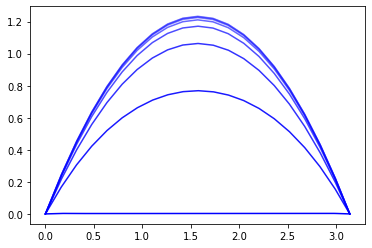

In [10]:
dt=0.0025
V,u,t = heatSolve(D,f,u0,L,h,T,dt,theta)

xtplot(V,u,t,'fade')
plt.show()

Notiamo che per $\Delta t = 0.25$ la soluzione risulta instabile e presenta oscillazioni,
mentre riducendolo a $\Delta t = 0.0025$ tale fenomeno non accade. Per il metodo di Eulero Esplicito infatti dobbiamo garantire che $\Delta t < \frac{2}{\lambda}$ dove $\lambda = \max |\lambda(M^{-1}A)|$.

**(c) (2 punti) [P]** Si risolva ora il problema con il metodo di Eulero Implicito, scegliendo
$\Delta t = 0.25$. Si rappresenti il valore della soluzione numerica al centro del dominio,
in tempo: $u_h (t, \frac{\pi}{2} )$ (da estrarre con un metodo a scelta). Cosa si osserva?

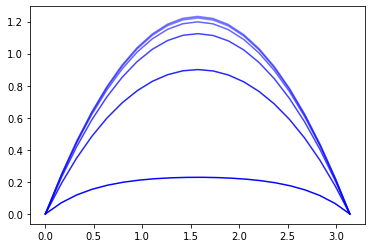

In [7]:
theta = 1 #Eulero implicito

dt=0.25
V,u,t = heatSolve(D,f,u0,L,h,T,dt,theta)

xtplot(V,u,t,'fade')
plt.show()

Notiamo che in questo caso, dato che utilizziamo un metodo implicito, la soluzione è stabile anche con un passo temporale grande. 

Un modo per estrarre il valore della soluzione è osservare che il punto richiesto è al centro del dominio, quindi corrisponde al grado di libertà $i=N/2+1 = 11$.

[0.         0.22764414 0.42094547 0.57944839 0.70746939 0.81024139
 0.89254744 0.95840254 1.01107632 1.05320146 1.08688876 1.11382784
 1.13537033 1.15259726 1.16637315 1.17738932 1.18619864 1.1932432
 1.19887652 1.20338133 1.20698369 1.20986439 1.21216801 1.21401014
 1.21548324 1.21666124 1.21760325 1.21835654 1.21895893 1.21944065
 1.21982586 1.2201339  1.22038024 1.22057722 1.22073474 1.22086071
 1.22096144 1.221042   1.22110641 1.22115792 1.22119911]


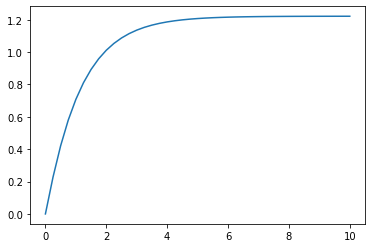

In [18]:
plt.plot(t, u[11,:])

Possiamo notare che la soluzione tende ad uno stato stazionario con l’avanzare del tempo. La soluzione analitica stazionaria è infatti data da $u(x) = \frac{1}{2}x(\pi − x)$.